In [36]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/elijahwoolford/Desktop/python /2015_Happiness.csv")
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
#Exploring the data

df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
#Correlation Table 

corrmat = df.corr()
corrmat

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


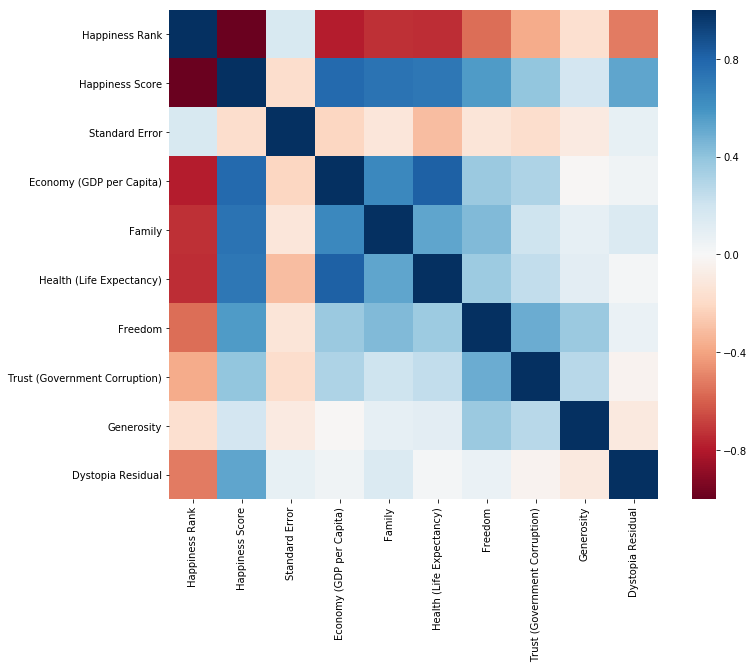

In [6]:
#Heatmap of the above correlation table

fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True, ax=ax, cmap="RdBu", vmax=1, vmin=-1)
plt.show()

In [7]:
#Seperates highly correlated variables with happiness rank

df_extremes = df.loc[((df["Happiness Rank"] > 0)), 
                  ["Country", "Region", "Happiness Score", "Economy (GDP per Capita)", 
                   "Family", "Health (Life Expectancy)"]]
df_extremes.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy)
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521
4,Canada,North America,7.427,1.32629,1.32261,0.90563


In [8]:
#Correlation table of the highly correlated variables 

corrmat2 = df_extremes.corr()
corrmat2

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy)
Happiness Score,1.000000,0.780966,0.740605,0.724200
Economy (GDP per Capita),0.780966,1.000000,0.645299,0.816478
Family,0.740605,0.645299,1.000000,0.531104
Health (Life Expectancy),0.724200,0.816478,0.531104,1.000000


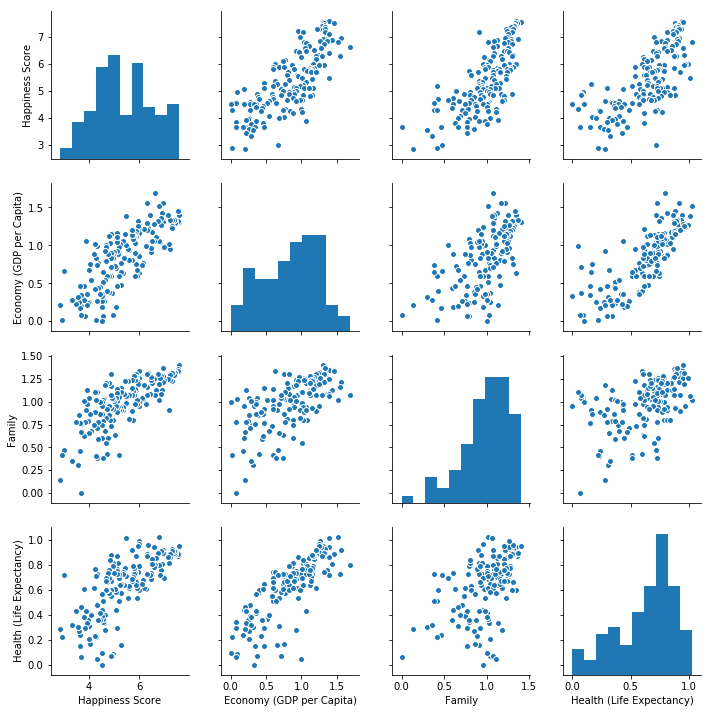

In [9]:
#Pairplot of the highly correlated variables 

g = sns.pairplot(df_extremes)

In [10]:
#Highly Correlated variables grouped by region 

average = df_extremes.groupby("Region").mean().reset_index()
average

,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy)
0,Australia and New Zealand,7.285000,1.291880,1.314450,0.919965
1,Central and Eastern Europe,5.332931,0.942438,1.053042,0.718774
2,Eastern Asia,5.626167,1.151780,1.099427,0.877388
3,Latin America and Caribbean,6.144682,0.876815,1.104720,0.703870
4,Middle East and Northern Africa,5.406900,1.066973,0.920490,0.705616
5,North America,7.273000,1.360400,1.284860,0.883710
6,Southeastern Asia,5.317444,0.789054,0.940468,0.677357
7,Southern Asia,4.580857,0.560486,0.645321,0.540830
8,Sub-Saharan Africa,4.202800,0.380473,0.809085,0.282332
9,Western Europe,6.689619,1.298596,1.247302,0.909148


In [52]:
#PCA on the three highly correlated variables (Economy, Family, Health)
#No need for feature creation, just for practice 

x = df_extremes.iloc[:,3:6]
standard = StandardScaler().fit_transform(x)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(standard)
pca_df = pd.DataFrame(data = principalComponents, columns = ["p1", "p2", "p3"])
pca_df.head()

,p1,p2,p3
0,-2.279543,-0.137431,0.000538
1,-2.253718,-0.335420,-0.230667
2,-2.033814,-0.350362,0.027410
3,-2.205111,-0.165582,0.273719
4,-2.034708,-0.169015,-0.022652


In [49]:
pca.explained_variance_ratio_

array([0.77856859, 0.16552513, 0.05590628])

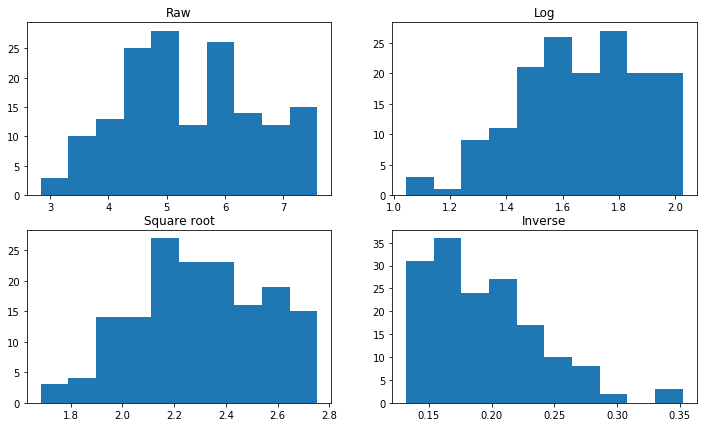

In [63]:
#See which figure has the best normal looking distribution for normalizing happiness score

fig = plt.figure(figsize=(12,7))

fig.add_subplot(221)
plt.hist(df['Happiness Score'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df["Happiness Score"]))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['Happiness Score']))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['Happiness Score'])
plt.title('Inverse')
plt.show()

In [73]:
#Create some features

features = pd.DataFrame()

#10 Possible Features

#These produce a score that the alternative sadnesss can be measured with
features["Sadness_Score"] = 10 - df["Happiness Score"]
features["Sadness_Rank"] = 157 - df["Happiness Rank"]

#These seperate the region in their respective hemispheres 
features["Western_Hemi"] = np.where((df["Region"].isin(["Latin America and Caribbean", "North America"])), 1,0)
features["Eastern_Hemi"] = np.where((features["Western_Hemi"].isin([0])), 1,0)

#These combine some of the highly correlated variables 
features["Family_Health"] = df["Family"] * df["Health (Life Expectancy)"]
features["Trust_Freedom"] = df["Freedom"] * df["Trust (Government Corruption)"]
features["Economy_Health"] = df["Economy (GDP per Capita)"] * df["Health (Life Expectancy)"]

#These features seperates the extremes by happiness rank into top 20 and bottom 20
features["Top_20"] = np.where(df["Happiness Rank"]<=20,1,0)
features["Bottom_20"] = np.where(df["Happiness Rank"]>138,1,0)

#This feature normalizes the happiness score
features["sqrt_Happiness"] = np.sqrt(df["Happiness Score"])

In [74]:
#Features
feature = pd.DataFrame()

feature["Sadness_Score"] = 10 - df["Happiness Score"]
feature["Family_Health"] = df["Family"] * df["Health (Life Expectancy)"]
feature["Top_20"] = np.where(df["Happiness Rank"]<=20,1,0)
feature["Bottom_20"] = np.where(df["Happiness Rank"]>138,1,0)
feature["sqrt_Happiness"] = np.sqrt(df["Happiness Score"])
feature.head()

,Sadness_Score,Family_Health,Top_20,Bottom_20,sqrt_Happiness
0,2.413,1.270469,1,0,2.754451
1,2.439,1.329090,1,0,2.749727
2,2.473,1.190018,1,0,2.743538
3,2.478,1.178170,1,0,2.742626
4,2.573,1.197795,1,0,2.725252


I chose the above as the best five features out of the 10 because they describe their respective components the best. The sadness score can be used as an alternative to happiness score if the question at hand is something that wants to explain why things are sad instead of happy. Family and health have the least correlation between the highly correlated variables. I am interested if a combination of the two will have a more positive or negative correlation for happiness score. Top and Bottom 20 are great extremes that may offer some kind of explaination of why countries are happy/sad and should offer more predictive power for my models. Finally, normalizing happiness score is necessary for some of the models. 